# Import

In [0]:
import string
from itertools import chain
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

from pyspark.ml.feature import *
from pyspark.ml.linalg import Vectors, VectorUDT
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

import sparknlp
from sparknlp.annotator import *
from sparknlp.common import *
from sparknlp.base import *

spark = sparknlp.start()
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

from pyspark.sql.types import *
from pyspark.sql.functions import *
import pyspark
from pyspark.sql import SparkSession

spark = SparkSession.builder.getOrCreate()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [0]:

meta_industries_12 = {
    'Furniture and Home Furnishings Manufacturing': 'Manufacturing',
    'Investment Banking': 'Financial and Investment',
    'Architecture and Planning': 'Services',
    'Wholesale': 'Services',
    'Travel Arrangements': 'Services',
    'Ranching': 'Miscellaneous',
    'Hospitals and Health Care': 'Healthcare and Medical',
    'Book and Periodical Publishing': 'Services',
    'Printing Services': 'Services',
    'Professional Training and Coaching': 'Services',
    'Computers and Electronics Manufacturing': 'Manufacturing',
    'Shipbuilding': 'Manufacturing',
    'Public Policy Offices': 'Government and Public Policy',
    'Software Development': 'Technology',
    'Outsourcing and Offshoring Consulting': 'Services',
    'Retail Groceries': 'Retail and Consumer Goods',
    'Education Administration Programs': 'Education and Training',
    'Plastics Manufacturing': 'Manufacturing',
    'Renewable Energy Semiconductor Manufacturing': 'Manufacturing',
    'Computer Networking Products': 'Technology',
    'Events Services': 'Services',
    'Information Services': 'Services',
    'Food and Beverage Services': 'Services',
    'Semiconductor Manufacturing': 'Manufacturing',
    'Business Consulting and Services': 'Services',
    'Insurance': 'Services',
    'Financial Services': 'Services',
    'Wireless Services': 'Services',
    'Computer Hardware Manufacturing': 'Technology',
    'Public Safety': 'Services',
    'Maritime Transportation': 'Transportation and Logistics',
    'Tobacco Manufacturing': 'Manufacturing',
    'Writing and Editing': 'Services',
    'Veterinary Services': 'Services',
    'Staffing and Recruiting': 'Services',
    'Accounting': 'Services',
    'International Affairs': 'Government and Public Policy',
    'Spectator Sports': 'Miscellaneous',
    'Glass, Ceramics and Concrete Manufacturing': 'Manufacturing',
    'Chemical Manufacturing': 'Manufacturing',
    'Mining': 'Miscellaneous',
    'E-Learning Providers': 'Technology',
    'Security and Investigations': 'Services',
    'Translation and Localization': 'Services',
    'Automation Machinery Manufacturing': 'Technology',
    'Computer and Network Security': 'Technology',
    'Political Organizations': 'Government and Public Policy',
    'Environmental Services': 'Government and Public Policy',
    'Oil and Gas': 'Miscellaneous',
    'Real Estate': 'Real Estate and Construction',
    'Think Tanks': 'Government and Public Policy',
    'Executive Offices': 'Miscellaneous',
    'Law Practice': 'Services',
    'Nanotechnology Research': 'Miscellaneous',
    'International Trade and Development': 'Government and Public Policy',
    'Personal Care Product Manufacturing': 'Manufacturing',
    'Philanthropic Fundraising Services': 'Services',
    'Entertainment Providers': 'Media and Entertainment',
    'Market Research': 'Media and Entertainment',
    'Movies, Videos, and Sound': 'Media and Entertainment',
    'Sporting Goods Manufacturing': 'Manufacturing',
    'Graphic Design': 'Services',
    'Technology, Information and Internet': 'Technology',
    'IT Services and IT Consulting': 'Technology',
    'Retail Office Equipment': 'Retail and Consumer Goods',
    'Wholesale Import and Export': 'Services',
    'Capital Markets': 'Financial and Investment',
    'Law Enforcement': 'Services',
    'Freight and Package Transportation': 'Transportation and Logistics',
    'Industrial Machinery Manufacturing': 'Manufacturing',
    'Non-profit Organizations': 'Miscellaneous',
    'Retail Art Supplies': 'Retail and Consumer Goods',
    'Animation and Post-production': 'Media and Entertainment',
    'Transportation, Logistics, Supply Chain and Storage': 'Transportation and Logistics',
    'Aviation and Aerospace Component Manufacturing': 'Transportation and Logistics',
    'Fundraising': 'Financial and Investment',
    'Railroad Equipment Manufacturing': 'Transportation and Logistics',
    'Construction': 'Real Estate and Construction',
    'Investment Management': 'Financial and Investment',
    'Utilities': 'Miscellaneous',
    'Retail Luxury Goods and Jewelry': 'Retail and Consumer Goods',
    'Warehousing and Storage': 'Transportation and Logistics',
    'Media Production': 'Media and Entertainment',
    'Gambling Facilities and Casinos': 'Media and Entertainment',
    'Defense and Space Manufacturing': 'Manufacturing',
    'Facilities Services': 'Services',
    'Government Relations Services': 'Government and Public Policy',
    'Advertising Services': 'Media and Entertainment',
    'Paper and Forest Product Manufacturing': 'Manufacturing',
    'Packaging and Containers Manufacturing': 'Manufacturing',
    'Telecommunications': 'Technology',
    'Medical Equipment Manufacturing': 'Healthcare and Medical',
    'Beverage Manufacturing': 'Manufacturing',
    'Restaurants': 'Retail and Consumer Goods',
    'Leasing Non-residential Real Estate': 'Real Estate and Construction',
    'Newspaper Publishing': 'Media and Entertainment',
    'Armed Forces': 'Miscellaneous',
    'Appliances, Electrical, and Electronics Manufacturing': 'Manufacturing',
    'Hospitality': 'Services',
    'Pharmaceutical Manufacturing': 'Healthcare and Medical',
    'Research Services': 'Services',
    'Retail Apparel and Fashion': 'Retail and Consumer Goods',
    'Photography': 'Media and Entertainment',
    'Wellness and Fitness Services': 'Services',
    'Truck Transportation': 'Transportation and Logistics',
    'Consumer Services': 'Services',
    'Wholesale Building Materials': 'Services',
    'Human Resources Services': 'Services',
    'Airlines and Aviation': 'Transportation and Logistics',
    'Machinery Manufacturing': 'Manufacturing',
    'Individual and Family Services': 'Services',
    'Motor Vehicle Manufacturing': 'Manufacturing',
    'Performing Arts': 'Media and Entertainment',
    'Museums, Historical Sites, and Zoos': 'Media and Entertainment',
    'Broadcast Media Production and Distribution': 'Media and Entertainment',
    'Banking': 'Financial and Investment',
    'Recreational Facilities': 'Miscellaneous',
    'Government Administration': 'Government and Public Policy',
    'Public Relations and Communications Services': 'Media and Entertainment',
    'Fisheries': 'Miscellaneous',
    'Medical Practices': 'Healthcare and Medical',
    'Religious Institutions': 'Miscellaneous',
    'Online Audio and Video Media': 'Media and Entertainment',
    'Artists and Writers': 'Miscellaneous',
    'Biotechnology Research': 'Healthcare and Medical',
    'Legal Services': 'Services',
    'Retail': 'Retail and Consumer Goods',
    'Civil Engineering': 'Services',
    'Libraries': 'Miscellaneous',
    'Alternative Dispute Resolution': 'Miscellaneous',
    'Manufacturing': 'Miscellaneous',
    'Design Services': 'Services',
    'Dairy Product Manufacturing': 'Manufacturing',
    'Higher Education': 'Education and Training',
    'Civic and Social Organizations': 'Miscellaneous',
    'Textile Manufacturing': 'Manufacturing',
    'Venture Capital and Private Equity Principals': 'Financial and Investment',
    'Mental Health Care': 'Healthcare and Medical',
    'Musicians': 'Media and Entertainment',
    'Farming': 'Miscellaneous',
    'Computer Games': 'Media and Entertainment',
    'Strategic Management Services': 'Services',
    'Food and Beverage Manufacturing': 'Manufacturing',
    'Primary and Secondary Education': 'Education and Training',
    'Alternative Medicine': 'Healthcare and Medical',
    'Legislative Offices': 'Services',
    'Administration of Justice': 'Services',
    'Mobile Gaming Apps': 'Media and Entertainment'
}

# Upload new & old companies trend and merge the linkedin companies data

In [0]:
companies = spark.read.parquet('/linkedin/companies')

# upload companies trend
old_companies_trend_df = pd.read_csv("/dbfs/FileStore/shared_uploads/omriitzhaki@campus.technion.ac.il/final_old_companies_trend_preprocess")
new_companies_trend_df = pd.read_csv("/dbfs/FileStore/shared_uploads/omriitzhaki@campus.technion.ac.il/final_new_companies_trend_preprocess")
old_companies = spark.createDataFrame(old_companies_trend_df)
new_companies = spark.createDataFrame(new_companies_trend_df)

# merge with linkedin companies data
old_companies = companies.join(old_companies, 'name', 'inner')
new_companies = companies.join(new_companies, 'name', 'inner')

# Filter companies that contain & in thier name
old_companies = old_companies.filter(~col("search_name").contains("&"))
new_companies = new_companies.filter(~col("search_name").contains("&"))

# filter old & new companies according to our definition
old_companies = old_companies.filter(col('founded') >= '1900').filter(col('founded') < '2020')
new_companies = new_companies.filter(col('founded') >= '2020').filter(col('founded') < '2025')

# add meta_industry column
meta_industry = udf(lambda x: meta_industries_12[x] )

old_companies = old_companies.filter(old_companies.industries.isNotNull())
old_companies = old_companies.withColumn('meta_industry', meta_industry(col('industries')))

new_companies = new_companies.filter(new_companies.industries.isNotNull())
new_companies = new_companies.withColumn('meta_industry', meta_industry(col('industries')))

# Part 1- Stability

In [0]:
predicted_stability_df = spark.read.csv("/dbfs/FileStore/shared_uploads/omriitzhaki@campus.technion.ac.il/predicted_stability_df", header=True)
predicted_stability_df = predicted_stability_df.withColumnRenamed("id", "new_company_id")

new_companies = new_companies.join(predicted_stability_df, new_companies['id'] == predicted_stability_df['new_company_id'], 'inner')

new_companies.select('id', 'predicted_stability').limit(10).display()

id,predicted_stability
novel-commerce,9.241487943321799
livingroomla,17.01695451937772
growthfactoryhq,19.269166986866583
bunnystudio,17.476356970195607
thespaceauto,9.69970414555912
as-one-consulting,10.106905664124586
park-magazine,8.648952480583475
flexenergysales,11.812492395170167
fusionnow,12.685039785935247
pieces-of-i-llc,10.890049197557047


# Part 2- Popularity

In [0]:
predicted_popularity_df = spark.read.csv("/dbfs/FileStore/shared_uploads/omriitzhaki@campus.technion.ac.il/predicted_popularity_df", header=True)
predicted_popularity_df = predicted_popularity_df.withColumnRenamed("id", "new_company_id1")

new_companies = new_companies.join(predicted_popularity_df, new_companies['id'] == predicted_popularity_df['new_company_id1'], 'inner')

new_companies.select('id', 'predicted_popularity').limit(10).display()

id,predicted_popularity
novel-commerce,Very Popular
livingroomla,Neutral Popularity
growthfactoryhq,Neutral Popularity
bunnystudio,Very Popular
thespaceauto,Neutral Popularity
as-one-consulting,Neutral Popularity
park-magazine,Very Popular
flexenergysales,Very Popular
fusionnow,Neutral Popularity
pieces-of-i-llc,Very Popular


# Part 3- Growth

In [0]:
new_companies = new_companies.withColumnRenamed("growth", "predicted_growth")
new_companies.select('id', 'predicted_growth').limit(10).display()

id,predicted_growth
novel-commerce,-0.009787054892843
livingroomla,-0.0461813662991763
growthfactoryhq,0.0372947885568845
bunnystudio,-0.0998216958656624
thespaceauto,0.0010591145980744
as-one-consulting,0.1311262016135571
park-magazine,-0.1282626730322804
flexenergysales,-0.1769152568521228
fusionnow,-0.0096483449406601
pieces-of-i-llc,-0.0773494106388113


In [0]:
print(f'number of old companies: {old_companies.count()}')
print(f'number of new companies: {new_companies.count()}')

number of old companies: 11300
number of new companies: 609


# Result Analysis

In [0]:
df = new_companies.toPandas()
df['predicted_stability'] = df['predicted_stability'].astype(float)
df['predicted_growth'] = df['predicted_growth'].astype(float)
df[['id', 'predicted_stability', 'predicted_popularity','predicted_growth']].head()

/databricks/spark/python/pyspark/sql/pandas/conversion.py:119: UserWarning: toPandas attempted Arrow optimization because 'spark.sql.execution.arrow.pyspark.enabled' is set to true; however, failed by the reason below:
  Unable to convert the field affiliated. If this column is not necessary, you may consider dropping it or converting to primitive type before the conversion.
Direct cause: Unsupported type in conversion to Arrow: ArrayType(StructType([StructField('Links', StringType(), True), StructField('location', StringType(), True), StructField('subtitle', StringType(), True), StructField('title', StringType(), True)]), True)
Attempting non-optimization as 'spark.sql.execution.arrow.pyspark.fallback.enabled' is set to true.
  warn(msg)


,id,predicted_stability,predicted_popularity,predicted_growth
0,novel-commerce,9.241488,Very Popular,-0.009787
1,livingroomla,17.016955,Neutral Popularity,-0.046181
2,growthfactoryhq,19.269167,Neutral Popularity,0.037295
3,bunnystudio,17.476357,Very Popular,-0.099822
4,thespaceauto,9.699704,Neutral Popularity,0.001059


## Popularity

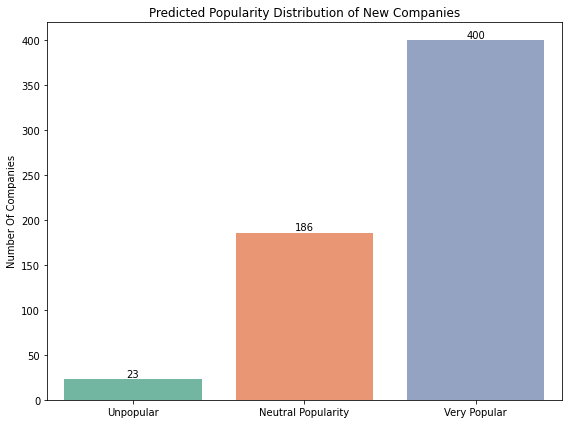

In [0]:
# Popularity
plt.figure(figsize=(8, 6))
popularity_order = ["Unpopular", "Neutral Popularity", "Very Popular"]
sns.countplot(data=df, x='predicted_popularity', palette='Set2', order=popularity_order)

plt.xlabel('')
plt.ylabel('Number Of Companies')
plt.title('Predicted Popularity Distribution of New Companies')

popularity_counts = df['predicted_popularity'].value_counts()
for i, count in enumerate(popularity_counts[popularity_order]):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()

## Stability

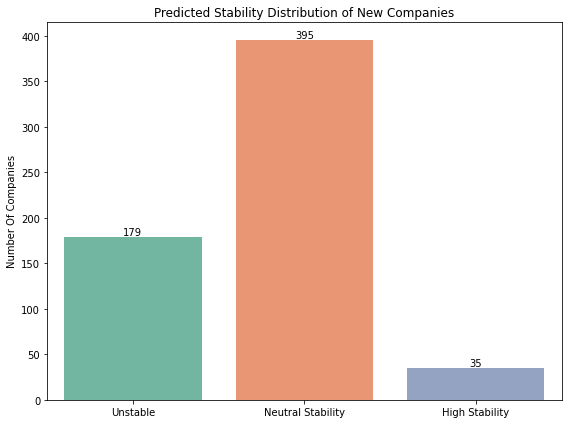

In [0]:
# Stability
low_stability_threshold =  6.48 # old_companies_df['stability'].quantile(0.3)
high_stability_threshold = 11.89 # old_companies_df['stability'].quantile(0.7)
df['predicted_category_stability'] = df['predicted_stability'].apply(lambda x: 'High Stability' if x < low_stability_threshold else ('Unstable' if x > high_stability_threshold else 'Neutral Stability'))

plt.figure(figsize=(8, 6))
stability_order = ["Unstable", "Neutral Stability", "High Stability"]
sns.countplot(data=df, x='predicted_category_stability', palette='Set2', order=stability_order)

plt.xlabel('')
plt.ylabel('Number Of Companies')
plt.title('Predicted Stability Distribution of New Companies')

stability_counts = df['predicted_category_stability'].value_counts()
for i, count in enumerate(stability_counts[stability_order]):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()

## Growth

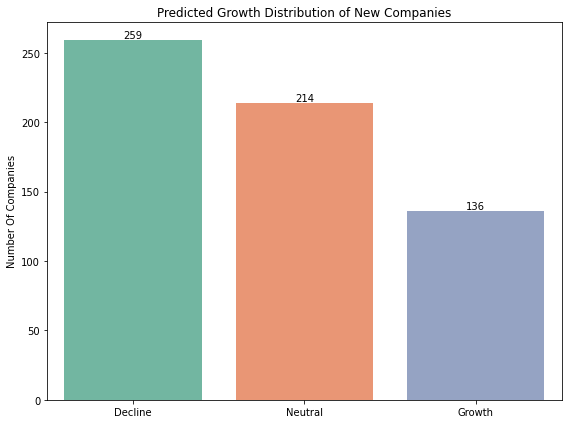

In [0]:
# Growth
low_growth_threshold = -0.01639 # old_companies_df['growth'].quantile(0.3)
high_growth_threshold = 0.05834 # old_companies_df['growth'].quantile(0.7)
df['predicted_category_growth'] = df['predicted_growth'].apply(lambda x: 'Decline' if x < low_growth_threshold else ('Growth' if x > high_growth_threshold else 'Neutral'))

plt.figure(figsize=(8, 6))
growth_order = ["Decline", "Neutral", "Growth"]
sns.countplot(data=df, x='predicted_category_growth', palette='Set2', order=growth_order)

plt.xlabel('')
plt.ylabel('Number Of Companies')
plt.title('Predicted Growth Distribution of New Companies')

growth_counts = df['predicted_category_growth'].value_counts()
for i, count in enumerate(growth_counts[growth_order]):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()

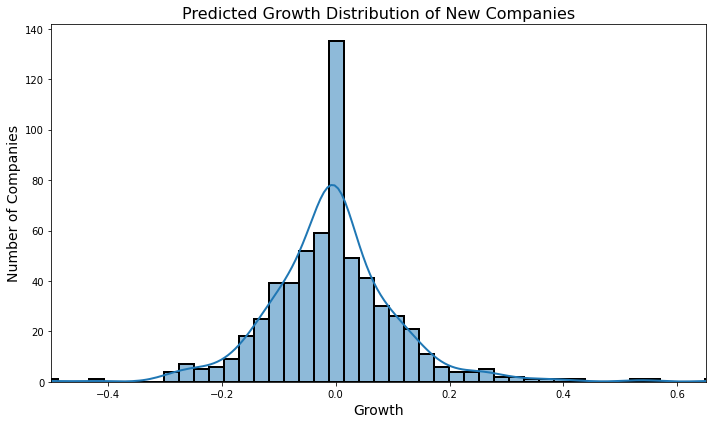

In [0]:
# Growth
plt.figure(figsize=(10, 6))
sns.histplot(df, x='predicted_growth', kde=True, linewidth=2, edgecolor='black')

# Add a title and labels
plt.title('Predicted Growth Distribution of New Companies', fontsize=16)
plt.xlabel('Growth', fontsize=14)
plt.ylabel('Number of Companies', fontsize=14)
plt.setp(plt.gca().get_lines(), linewidth=2)  # Set density curve linewidth
plt.xlim(-0.5, 0.65)
plt.tight_layout()
plt.show()


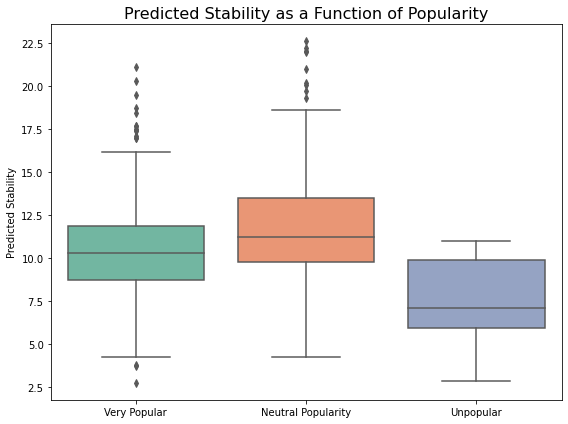

In [0]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df[df['predicted_stability'] < 23], x='predicted_popularity', y='predicted_stability', palette='Set2')
plt.title('Predicted Stability as a Function of Popularity', fontsize=16)
plt.xlabel('')
plt.ylabel('Predicted Stability')
plt.tight_layout()
plt.show()

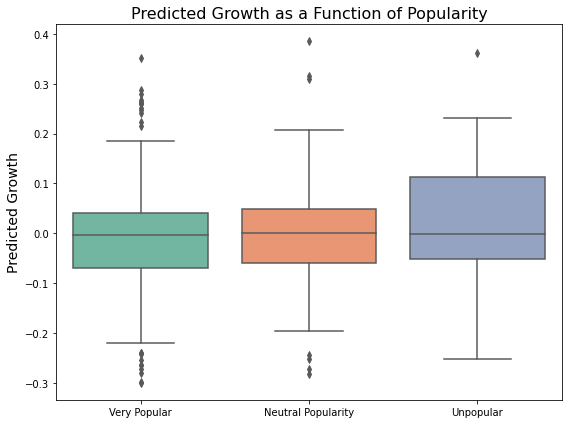

In [0]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df[(df['predicted_growth'] < 0.4) & (df['predicted_growth'] > -0.4)], x='predicted_popularity', y='predicted_growth', palette='Set2')
plt.title('Predicted Growth as a Function of Popularity', fontsize=16)
plt.xlabel('', fontsize=14)
plt.ylabel('Predicted Growth', fontsize=14)
plt.tight_layout()
plt.show()

## Meta Industry according to predicted labels

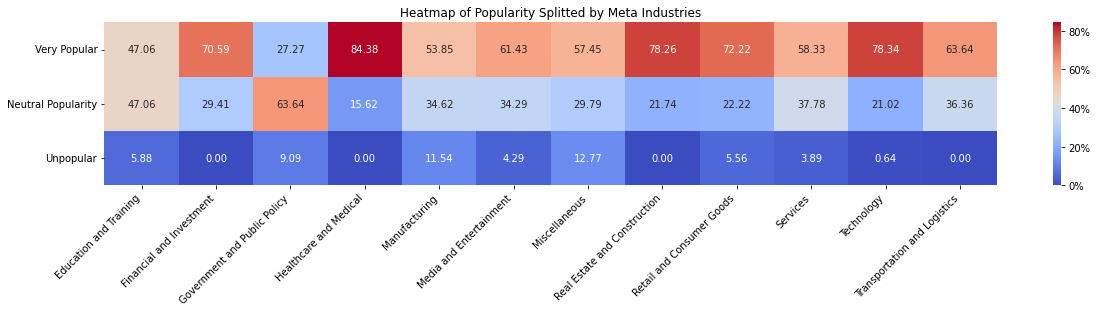

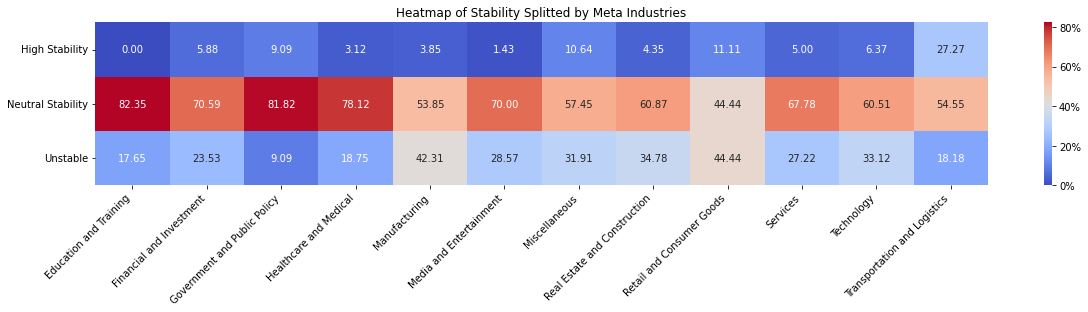

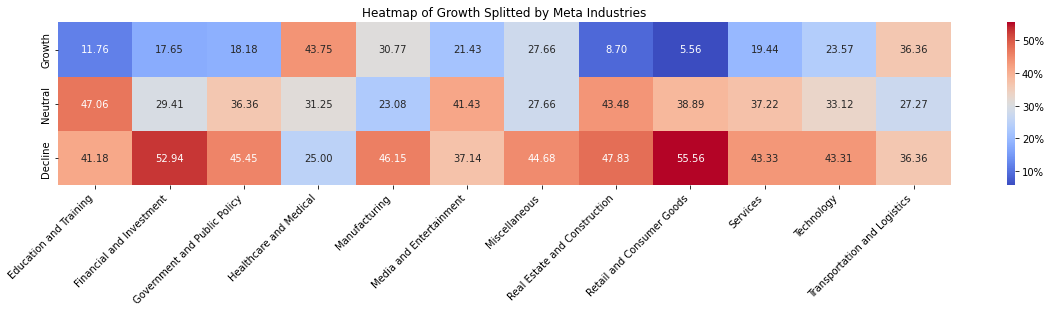

In [0]:
predicted_names = {'predicted_popularity': 'Popularity',
                   'predicted_category_stability': 'Stability',
                   'predicted_category_growth': 'Growth'}

# Define the order for each category
row_order = {'predicted_popularity': ['Very Popular', 'Neutral Popularity', 'Unpopular'],
          'predicted_category_stability': ['High Stability', 'Neutral Stability', 'Unstable'],
          'predicted_category_growth': ['Growth', 'Neutral', 'Decline']}

for predicted_col in ['predicted_popularity', 'predicted_category_stability', 'predicted_category_growth']:
    pivot_df = df.pivot_table(index='meta_industry', columns=predicted_col, aggfunc='size', fill_value=0)
    pivot_df = pivot_df.reindex(columns=row_order[predicted_col], fill_value=0) 
    # pivot_df = pivot_df[pivot_df.sum().sort_values(ascending=False).index]
    row_sum = pivot_df.sum(axis=1)
    normalized_df = pivot_df.div(row_sum, axis=0) * 100

    plt.figure(figsize=(20, 3))
    sns.heatmap(normalized_df.T, cmap='coolwarm', annot=True, fmt='.2f', cbar_kws={'format': '%.0f%%'})
    plt.xticks(rotation=45, ha='right')
    plt.xlabel('')
    plt.ylabel('')
    plt.title(f'Heatmap of {predicted_names[predicted_col]} Splitted by Meta Industries')
    plt.show()


## Companies with potential for success

In [0]:
precent = df[(df['predicted_growth'] > 0) & (df['predicted_stability'] < df['predicted_stability'].quantile(0.25)) & (df['predicted_popularity'] == 'Very Popular')].shape[0] / df.shape[0] * 100
print(f'{precent} % of the new companies exhibit potential for success')

7.060755336617405 % of the new companies exhibit potential for success


In [0]:
from IPython.display import Image, display

# Example of companies

,name,id,founded,predicted_popularity,predicted_growth,predicted_stability,industries
442,Quant,quantillinois,2021,Very Popular,0.124082,5.449529,Financial Services


About of the company: 
Founded in 2021, Quant is a student-led quantitative research and investment fund that empowers students with experiential learning opportunities to help them succeed in quantitative finance roles. Our corporate partners include Citadel, Jump Trading, The D.E. Shaw Group, and Robinhood.
Link to the linkedin if the company: 
https://www.linkedin.com/company/quantillinois


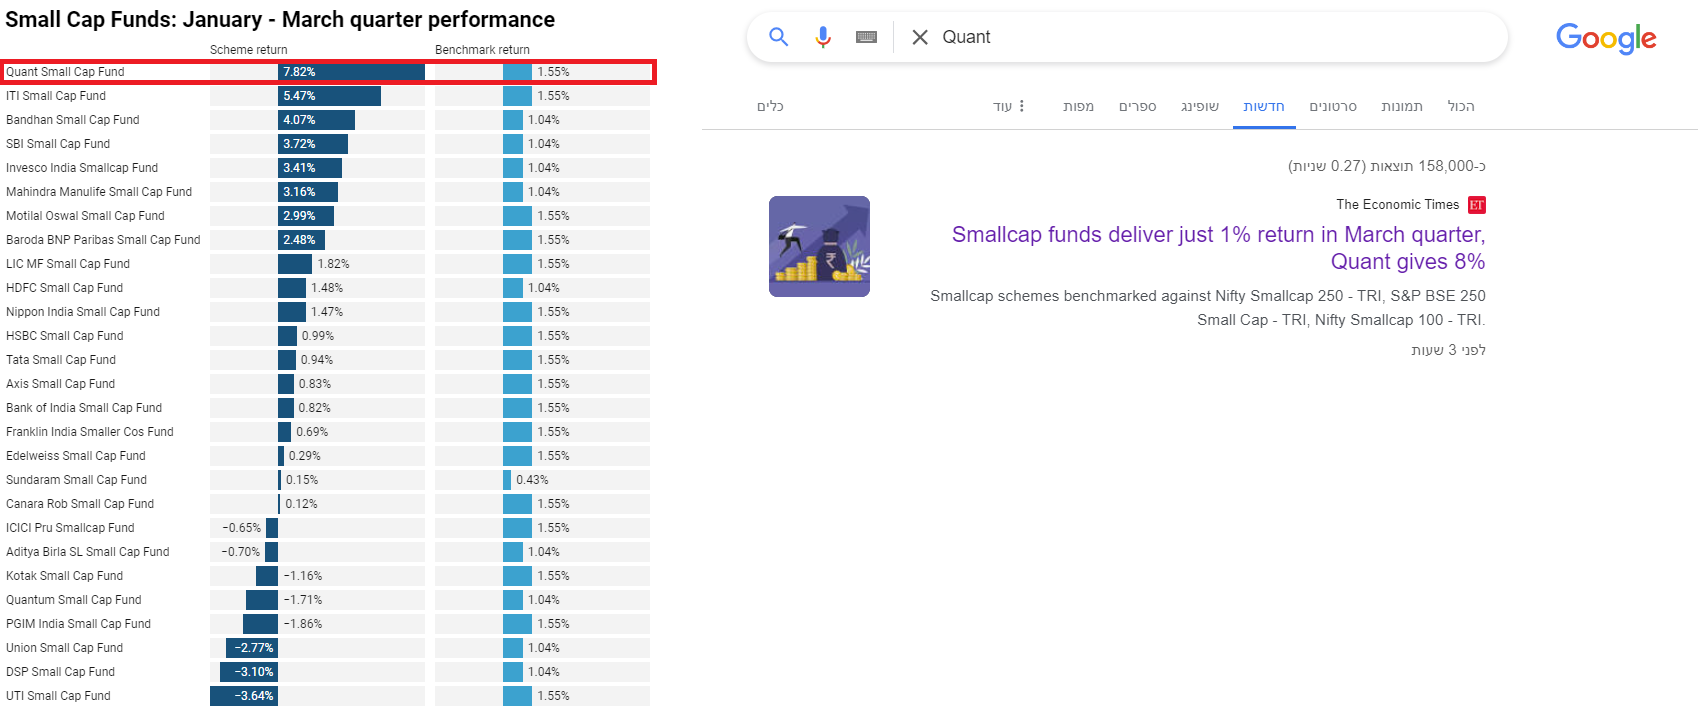

In [0]:
display(df[(df['name']=='Quant')][['name','id', 'founded', 'predicted_popularity', 'predicted_growth','predicted_stability','industries']])
print("About of the company: ")
print(df[df['name']=='Quant'].iloc[0]['about'])
print("Link to the linkedin if the company: ")
print(df[(df['name']=='Quant')].iloc[0]['url'])

display(Image('/Workspace/Users/omriitzhaki@campus.technion.ac.il/Project/quant.png'))

,name,id,founded,predicted_popularity,predicted_growth,predicted_stability,industries
505,Kodiak,kodiakchemical,2021,Very Popular,0.250971,8.438005,Chemical Manufacturing


About of the company: 
We are a specialty chemical company focused on engineering products for the steel, mining, energy, water treatment, and construction industries. As leaders in the global chemical industry our specialty process fluids are designed to improve the profitability and safety of industrial operations.
Link to the linkedin if the company:  https://www.linkedin.com/company/kodiakchemical


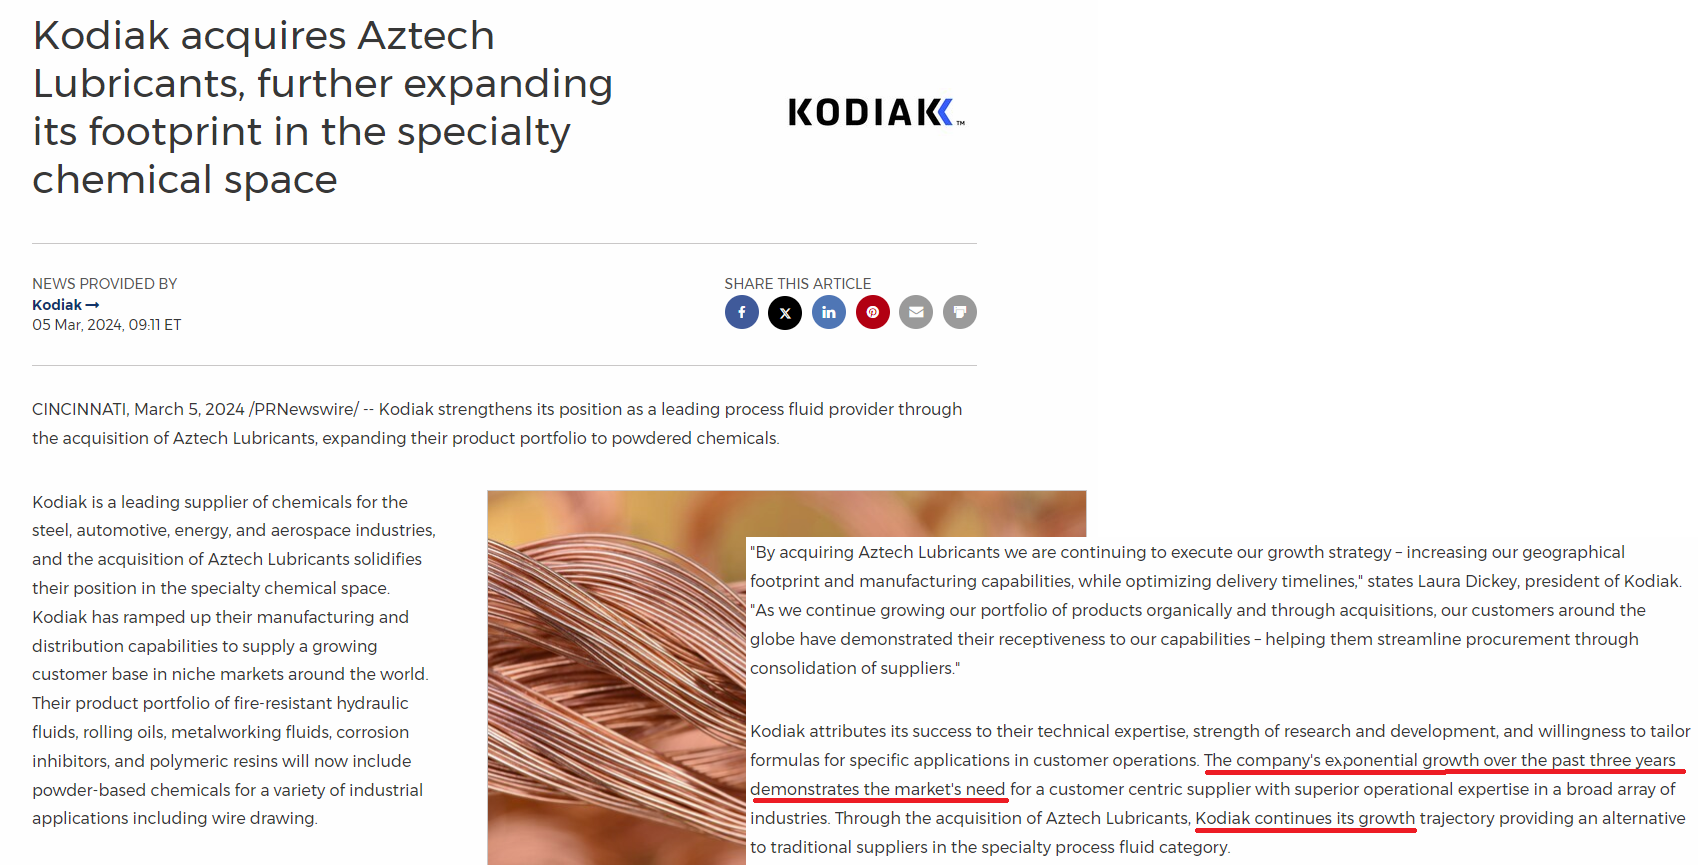

In [0]:
display(df[(df['name']=='Kodiak')][['name','id', 'founded', 'predicted_popularity', 'predicted_growth','predicted_stability','industries']])
print("About of the company: ")
print(df[df['name']=='Kodiak'].iloc[0]['about'])
print("Link to the linkedin if the company: ")
print(df[(df['name']=='Kodiak')].iloc[0]['url'])

display(Image('/Workspace/Users/omriitzhaki@campus.technion.ac.il/Project/kodiak.png'))